In [1]:
import numpy as np
import cv2 as cv

def find_in(name, sth):
    for v in sth:
        if v.startswith(name):
            return v
    print(sth)
    print("Oooops, {} wasn't found".format(name))
    print("(" + sth[0] + ")")
    return -1

def pad_img(img, padsize):
    # rows
    if len(img.shape) == 3:
        upper_pad = img[img.shape[0] - padsize:img.shape[0], :, :]
        lower_pad = img[0:padsize + 1, :, :]
    elif len(img.shape) == 2:
        upper_pad = img[img.shape[0] - padsize:img.shape[0], :]
        lower_pad = img[0:padsize + 1, :]
    img = np.concatenate((upper_pad, img), axis=0)
    img = np.concatenate((img, lower_pad), axis=0)

    # columns
    if len(img.shape) == 3:
        p = np.zeros((img.shape[0], padsize, img.shape[2]), dtype=np.float32)
    elif len(img.shape) == 2:
        p = np.zeros((img.shape[0], padsize), dtype=np.float32)

    img = np.concatenate((p, img), axis=1)
    img = np.concatenate((img, p), axis=1)

    return img

def bgr2rgb(img):
    return img[...,::-1]

def load_color_img(path, normalize_to_zero_one=True):
    if normalize_to_zero_one:
        return np.array( bgr2rgb(cv.imread(path)), dtype=np.float32 ) / 255.0
    else:
        return np.array(bgr2rgb(cv.imread(path)), dtype=np.float32)

def load_gray_img(path, normalize_to_zero_one=True):
    if normalize_to_zero_one:
        return np.array( cv.imread(path, 0), dtype=np.float32 ) / 255.0
    else:
        return np.array( cv.imread(path, 0), dtype=np.float32 )


In [2]:
import os

eyes_path = os.getcwd() + "/images" + "/"
vessels_path = os.getcwd() + "/vessels" + "/"
masks_path = os.getcwd() + "/mask" + "/"

In [10]:
import matplotlib.pyplot as plt
resize_scale = 0.25

imgs = os.listdir(eyes_path)
vessels = os.listdir(vessels_path)
masks = os.listdir(masks_path)
result_imgs = os.listdir(os.getcwd())

results = []
for res in result_imgs:
    if res.find('.png') != -1 and res.find('result') != -1:
        result = load_gray_img(res)
        name = res[:res.find('-')]
        
        mask = load_gray_img(masks_path + find_in(name, masks))
        real_vessel = load_gray_img(vessels_path + find_in(name, vessels))
        
        mask = cv.resize(mask, dsize=(0, 0), fx=resize_scale, fy=resize_scale)
        real_vessel = cv.resize(real_vessel, dsize=(0, 0), fx=resize_scale, fy=resize_scale)
        mask[mask > 0.0] = 1.0
        real_vessel[real_vessel > 0.0] = 1.0
        
        #print(name)
        error = np.sum( (result - real_vessel) ** 2 ) / (len(result) * len(result[0]))
        #print(error)
        
        results.append([name, error])
        
results = list(sorted(results, key=lambda x : x[1] * -1))
for r in results:
    print(r)
#plt.imshow(result)
        #plt.show()

['11_dr', 0.09769656595984237]
['06_dr', 0.06422405704635016]
['14_dr', 0.059372458872834176]
['07_dr', 0.05867658097203978]
['12_g', 0.05867071683242635]
['14_g', 0.05822895164821417]
['10_dr', 0.05748420591730781]
['15_dr', 0.05725941389879277]
['08_dr', 0.05618236692312504]
['13_g', 0.05552949271282917]
['12_dr', 0.05491766747982736]
['01_dr', 0.05488052792894227]
['11_g', 0.05401263526615375]
['07_g', 0.053828892224932756]
['01_g', 0.05362755676487146]
['04_dr', 0.05266388315506349]
['02_g', 0.052200616125602055]
['03_dr', 0.051639613435916686]
['05_dr', 0.051395274285356854]
['15_g', 0.05049806092450116]
['02_dr', 0.050185306811784576]
['09_g', 0.04934478013385876]
['01_h', 0.04867431350472259]
['10_g', 0.047655907925189214]
['13_dr', 0.047302104835178584]
['13_h', 0.046377525489460183]
['14_h', 0.04586148120347783]
['09_dr', 0.04554481766435228]
['06_g', 0.04544708200412836]
['03_h', 0.04529461437417902]
['05_g', 0.04363310815037218]
['02_h', 0.0430271470569838]
['04_g', 0.042169

01_g
0.034988526444337587
0.050570385313066867


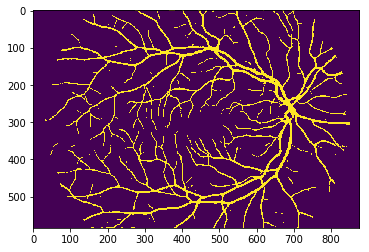

05_dr
0.03309248517838713
0.04824427659973728


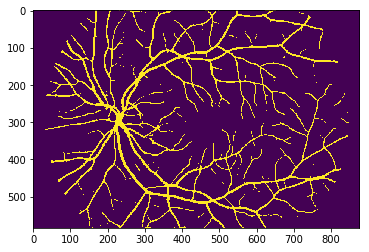

10_g
0.031855632762654816
0.045114780759366986


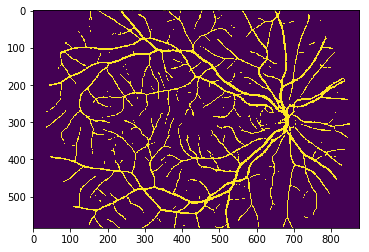

12_dr
0.03622130908609339
0.05088509413898793


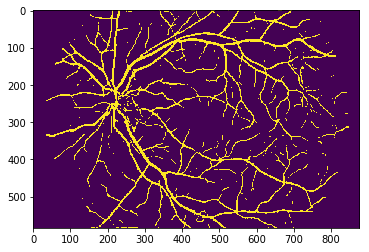

12_h
0.028481776773828932
0.03714932445111653


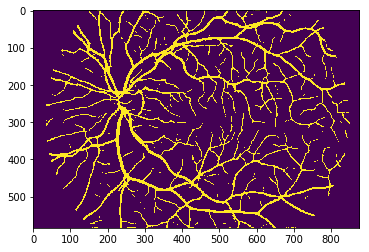

14_g
0.03853222295849753
0.054333208231688246


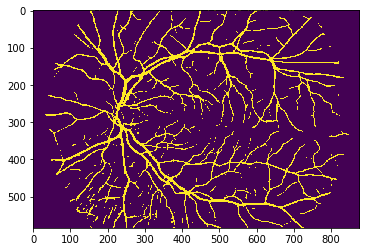

In [22]:
import matplotlib.pyplot as plt
resize_scale = 0.25

def process_sth(sth):
    new_sth = np.zeros(sth.shape, dtype=np.float32)
    for x in range(1, len(new_sth)-1):
        for y in range(1, len(new_sth[0]) - 1):
            avg_value = np.mean(sth[x-1:x+2, y-1:y+2])
            new_sth[x, y] = avg_value
    new_sth[new_sth > np.percentile(new_sth, 0.75)] = 1.0
    new_sth[new_sth != 1.0] = 0.0
    return new_sth

imgs = os.listdir(eyes_path)
vessels = os.listdir(vessels_path)
masks = os.listdir(masks_path)
result_imgs = os.listdir(os.getcwd())
for res in result_imgs:
    if res.find('.png') != -1 and res.find('sth') != -1:
        result = 1.0 - load_gray_img(res)
        name = res[:res.find('-')]
        
        mask = load_gray_img(masks_path + find_in(name, masks))
        real_vessel = load_gray_img(vessels_path + find_in(name, vessels))
        
        mask = cv.resize(mask, dsize=(0, 0), fx=resize_scale, fy=resize_scale)
        real_vessel = cv.resize(real_vessel, dsize=(0, 0), fx=resize_scale, fy=resize_scale)
        
        mask[mask > 0.0] = 1.0
        real_vessel[real_vessel > 0.0] = 1.0
        result[mask == 0.0] = 0.0
        
        result[result < 0.3] = 0.0
                
        print(name)
        error = np.sum( (result - real_vessel) ** 2 ) / (len(result) * len(result[0]))
        print(error)
        
        th = 0.5
        result[result < th] = 0.0
        result[result > th] = 1.0
        
        error = np.sum( (result - real_vessel) ** 2 ) / (len(result) * len(result[0]))
        print(error)
        
        plt.imshow(result)
        plt.show()
